In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## 读取时间序列

In [2]:
goertek = pd.read_csv('./data/gertek_2016_d.csv')
goertek.head()

,date,open,high,close,low,...,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2016-12-23,3333.40,3334.89,3307.60,3300.88,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
1,2016-12-22,3335.12,3340.36,3335.67,3322.72,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2,2016-12-21,3313.75,3342.48,3338.54,3313.75,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
3,2016-12-20,3328.30,3329.10,3309.06,3289.27,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
4,2016-12-19,3342.34,3344.86,3328.98,3325.00,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [3]:
type(goertek['date'])

pandas.core.series.Series

In [4]:
type(goertek['date'][0])

str

In [5]:
goertek['date'] = pd.to_datetime(goertek['date'])
type(goertek['date'][0])

pandas._libs.tslib.Timestamp

In [6]:
goertek = goertek.set_index('date')
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [8]:
goertek = pd.read_csv('./data/gertek_2016_d.csv', index_col='date', parse_dates=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [9]:
type(goertek.index)

pandas.core.indexes.datetimes.DatetimeIndex

> ## 原来可以在我们加载csv的时候，直接通过 **`parse_dates=True`** 就直接把字符串的时间格式化为datetime格式。

## DateOffset与TimeDelta

In [10]:
lastday = pd.datetime(2016, 12, 31)
lastday

datetime.datetime(2016, 12, 31, 0, 0)

In [11]:
newyear = lastday + pd.DateOffset(days=1)
newyear

Timestamp('2017-01-01 00:00:00')

In [12]:
today = pd.datetime.now()
today

datetime.datetime(2018, 2, 24, 14, 17, 50, 678279)

In [13]:
today + pd.DateOffset(weeks=1)

Timestamp('2018-03-03 14:17:50.678279')

In [14]:
today + 2*pd.DateOffset(years=2, months=6)

Timestamp('2023-02-24 14:17:50.678279')

In [15]:
import datetime

In [16]:
weekDelta = datetime.timedelta(weeks=1)
weekDelta

datetime.timedelta(7)

In [17]:
datetime.timedelta(7)

datetime.timedelta(7)

In [18]:
today = pd.datetime.now()

In [19]:
today + weekDelta

datetime.datetime(2018, 3, 3, 14, 23, 12, 168606)

## 时间序列函数

In [20]:
goertek = goertek.sort_index(ascending=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-05,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-06,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0
2016-01-07,3481.150,3481.150,3294.384,3284.737,44102640.0,...,3643.533,3694.525,113886000.0,119773936.0,138700858.8
2016-01-08,3371.871,3418.851,3361.563,3237.931,185959456.0,...,3596.749,3681.449,130703180.8,123651742.4,141988050.4


In [21]:
goertek.tail()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4


> 注意：这个地方的 **`shift`** 函数的作用是 **`索引往前移`** 。因为索引往前移了以后，前几行没有数据，所以对应的数据变成NaN了。

In [22]:
goertek.shift(1).head(3)

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8


> 在使用 **`shift`** 函数的时候，还可以指定具体的规则，，其中 **`pd.datetools.bday`** 是指 **`工作日`**。

In [23]:
goertek.shift(1, freq=pd.datetools.bday).head(3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.bday is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-07,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0


> 当然也可以按特定的顺序取，使用 **`asfreq`** 方法，其中的参数 **`BM`** 是指每月的工作日，也就是每月的最后的工作日。

In [24]:
goertek.asfreq('BM')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-29,2855.598,2965.309,2946.090,2854.371,113304256.0,...,3052.263,3178.529,110646072.0,111380396.8,122499499.2
2016-02-29,2939.580,2939.875,2877.467,2821.215,129341024.0,...,3026.766,2982.232,123694110.4,121202825.6,108902741.2
2016-03-31,3229.200,3241.927,3218.088,3208.665,121552072.0,...,3200.245,3138.345,107497318.4,138788992.8,129922554.0
2016-04-29,3153.537,3171.289,3156.745,3149.397,58029776.0,...,3180.772,3210.231,62888933.6,83644518.0,103044368.2
2016-05-31,3068.596,3170.926,3169.559,3068.596,138863104.0,...,3078.173,3094.970,75895244.0,69714819.6,74371733.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,3217.192,3225.418,3203.930,3198.683,88044840.0,...,3236.933,3235.643,102453550.4,95620234.4,112470896.4
2016-08-31,3310.565,3333.972,3327.793,3304.655,79570808.0,...,3330.161,3305.741,82890593.6,95886160.0,107540506.4
2016-09-30,3240.177,3260.940,3253.284,3239.036,44978024.0,...,3254.355,3279.082,54814162.4,57857660.8,72046803.6


> 在其中的参数 **`method='ffill'`** 是指 **`没有的数据进行填充的时候取前一个`**。

In [25]:
goertek.asfreq('H', method='ffill')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04 00:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 01:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 02:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 03:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 04:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 20:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 21:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 22:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0


* B, BM: This stands for business day, business month. These are the working days of the month, that is, any day that is not a holiday or a weekend.
* D, W, M, Q, A: It stands for calendar day, week, month, quarter, year-end.
* H, T, S, L, U: It stands for hour, minute, second, millisecond, and microsecond.

In [29]:
goertek_m = pd.read_csv('./data/gertek_2016.csv', parse_dates=True, index_col='date')

In [32]:
goertek_m.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-22 15:00:00,3334.41,3335.63,3335.63,3332.22,7712410.0,...,3330.84,3331.32,5323810.0,4528870.0,5701990.0
2016-12-22 14:45:00,3339.31,3340.04,3334.36,3334.36,5514220.0,...,3330.25,3331.27,4604820.0,4151560.0,5685350.0
2016-12-22 14:30:00,3334.99,3339.39,3339.31,3332.52,4879690.0,...,3329.80,3331.50,4160060.0,4118640.0,5785230.0
2016-12-22 14:15:00,3331.56,3336.99,3335.10,3331.56,4383980.0,...,3328.52,3331.33,3909410.0,4263560.0,5786760.0
2016-12-22 14:00:00,3328.97,3331.21,3331.21,3328.01,4128750.0,...,3328.40,3331.38,3858020.0,4628960.0,5906510.0


In [30]:
goertek_resample = goertek_m.resample('30Min')  # pandas 0.18   http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#resample-api

In [31]:
goertek_resample.mean()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-10-10 10:30:00,3263.620,3272.490,3272.120,3263.620,4251170.0,...,3260.320,3257.260,6711080.0,5132490.0,3723360.0
2016-10-10 11:00:00,3277.510,3280.080,3279.470,3276.810,4289200.0,...,3262.740,3258.580,4822160.0,5362790.0,3780180.0
2016-10-10 11:30:00,3279.470,3292.100,3291.250,3279.310,5250670.0,...,3265.930,3260.440,4565530.0,5557140.0,3905820.0
2016-10-10 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-10-10 12:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 13:00:00,3327.580,3328.270,3323.200,3323.120,3626460.0,...,3330.550,3331.650,4077220.0,6539310.0,6348340.0
2016-12-22 13:30:00,3324.625,3328.825,3327.610,3324.315,3703935.0,...,3328.815,3331.620,3716125.0,5723880.0,6146430.0
2016-12-22 14:00:00,3330.265,3334.100,3333.155,3329.785,4256365.0,...,3328.460,3331.355,3883715.0,4446260.0,5846635.0


## 股票数据案例

In [33]:
import tushare as ts
from datetime import datetime

In [34]:
auto_list = ['000625', '600104', '002594', '601238']
# auto_var = ['changan', 'sqjt', 'byd', 'gqjt']

In [35]:
# for stock, var in zip(auto_list, autovar):
#     globals()[var] = ts.get_h_data(stock, '2016-01-01', '2016-12-23')
changan = ts.get_h_data('000625', '2016-01-01', '2016-12-23')

[Getting data:]###

In [36]:
sqjt = ts.get_h_data('600104', '2016-01-01', '2016-12-23')

[Getting data:]###

In [37]:
byd = ts.get_h_data('002594', '2016-01-01', '2016-12-23')

[Getting data:]###

In [38]:
gqjt = ts.get_h_data('601238', '2016-01-01', '2016-12-23')

[Getting data:]###

In [39]:
#changan=pd.read_csv('../data/changan.csv',index_col='date',parse_dates=True)
changan.head()

,open,high,close,low,volume,amount
date,,,,,,
2016-12-23,12.23,12.23,12.05,12.02,17339349.0,261627029.0
2016-12-22,12.23,12.31,12.24,12.12,21042253.0,320306792.0
2016-12-21,12.12,12.24,12.23,12.10,18803404.0,285494781.0
2016-12-20,12.18,12.20,12.08,12.01,16265938.0,245299075.0
2016-12-19,12.25,12.29,12.16,12.12,14068049.0,214149866.0


In [40]:
changan.describe()

,open,high,close,low,volume,amount
count,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02
mean,12.000594,12.161461,11.996347,11.849178,2.967817e+07,4.572622e+08
std,0.781459,0.783512,0.774684,0.786982,1.816421e+07,2.902145e+08
min,10.570000,10.730000,10.480000,10.260000,8.074326e+06,1.254679e+08
25%,11.195000,11.375000,11.190000,11.055000,1.739413e+07,2.612642e+08
50%,12.250000,12.430000,12.260000,12.100000,2.552496e+07,3.804228e+08
75%,12.600000,12.760000,12.605000,12.490000,3.458674e+07,5.210668e+08
max,13.400000,13.840000,13.450000,13.230000,1.360965e+08,2.020822e+09


In [41]:
changan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2016-12-23 to 2016-01-04
Data columns (total 6 columns):
open      219 non-null float64
high      219 non-null float64
close     219 non-null float64
low       219 non-null float64
volume    219 non-null float64
amount    219 non-null float64
dtypes: float64(6)
memory usage: 12.0 KB


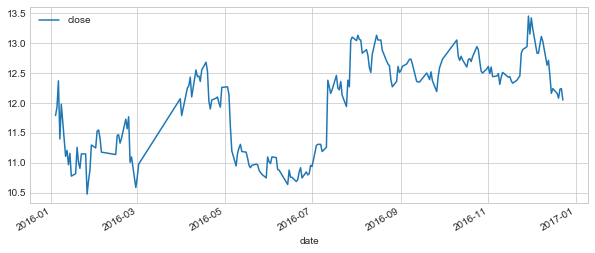

In [42]:
changan['close'].plot(legend=True, figsize=(10,4))

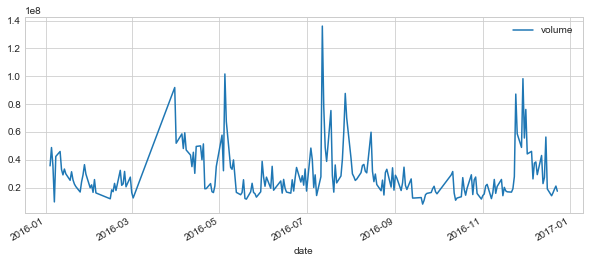

In [43]:
changan['volume'].plot(legend=True, figsize=(10, 4))

> 这个 **`rolling`** 实际上是划窗的操作，就是每指定的单元格为一个窗口，进行统一的操作。其中的参数 **`window`** 就是 **`用来指定窗口的大小`** ， **`之后依次进行操作`** 。

In [49]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    changan[column_name] = changan['close'].rolling(window=ma).mean()
    #changan[column_name] = pd.rolling_mean(changan['close'],ma)    # 这个是pandas0.18之前的方式

In [50]:
changan.head(10)

,open,high,close,low,volume,amount,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,,
2016-12-23,12.23,12.23,12.05,12.02,17339349.0,261627029.0,NaN,NaN,NaN
2016-12-22,12.23,12.31,12.24,12.12,21042253.0,320306792.0,NaN,NaN,NaN
2016-12-21,12.12,12.24,12.23,12.10,18803404.0,285494781.0,NaN,NaN,NaN
2016-12-20,12.18,12.20,12.08,12.01,16265938.0,245299075.0,NaN,NaN,NaN
2016-12-19,12.25,12.29,12.16,12.12,14068049.0,214149866.0,NaN,NaN,NaN
2016-12-16,12.16,12.28,12.24,12.12,18997053.0,289451691.0,NaN,NaN,NaN
2016-12-15,12.45,12.47,12.16,12.05,56302122.0,860135187.0,NaN,NaN,NaN
2016-12-14,12.69,12.76,12.45,12.45,27230313.0,428587199.0,NaN,NaN,NaN
2016-12-13,12.50,12.79,12.71,12.49,22822088.0,361173650.0,NaN,NaN,NaN


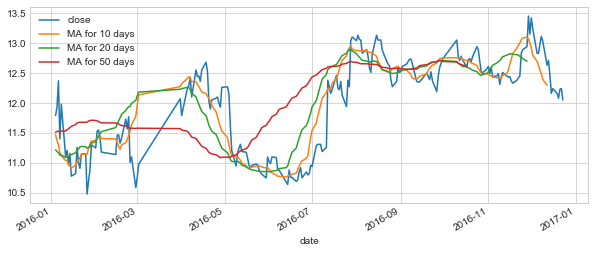

In [51]:
changan[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))

In [52]:
changan.head(20)

,open,high,close,low,volume,amount,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,,
2016-12-23,12.23,12.23,12.05,12.02,17339349.0,2.616270e+08,NaN,NaN,NaN
2016-12-22,12.23,12.31,12.24,12.12,21042253.0,3.203068e+08,NaN,NaN,NaN
2016-12-21,12.12,12.24,12.23,12.10,18803404.0,2.854948e+08,NaN,NaN,NaN
2016-12-20,12.18,12.20,12.08,12.01,16265938.0,2.452991e+08,NaN,NaN,NaN
2016-12-19,12.25,12.29,12.16,12.12,14068049.0,2.141499e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2016-12-02,13.40,13.54,13.24,13.12,44137523.0,7.317511e+08,12.797,NaN,NaN
2016-12-01,13.26,13.73,13.42,13.23,76139887.0,1.282691e+09,12.923,NaN,NaN
2016-11-30,13.38,13.44,13.15,13.07,55585253.0,9.136051e+08,12.993,NaN,NaN


> 还有一个很有用的方法是 **`pct_change`** ，是指 **`变动比率`** 。

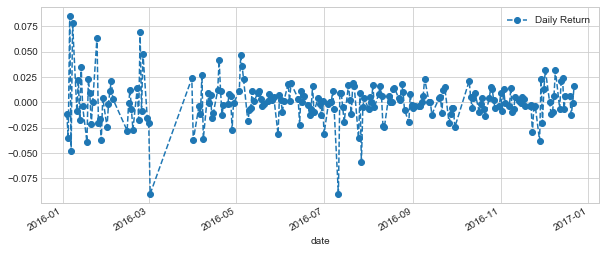

In [53]:
changan['Daily Return'] = changan['close'].pct_change()
changan['Daily Return'].plot(figsize=(10, 4), legend=True, linestyle='--', marker='o')

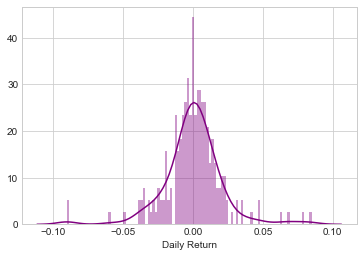

In [54]:
sns.distplot(changan['Daily Return'].dropna(), bins=100, color='purple')

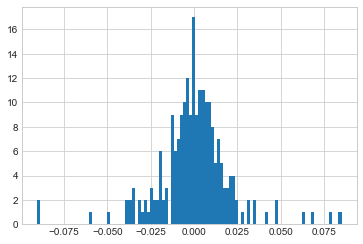

In [55]:
changan['Daily Return'].hist(bins=100)

In [56]:
#gqjt=pd.read_csv('../data/gqjt_2016.csv',index_col='date',parse_dates=True)

In [57]:
closing_df = pd.DataFrame({'changan': changan['close'], 'gqjt': gqjt['close'], 'byd': byd['close']})

In [58]:
closing_df.head()

,byd,changan,gqjt
date,,,
2016-01-04,73.74,11.79,18.52
2016-01-05,74.48,11.93,19.23
2016-01-06,75.82,12.37,20.23
2016-01-07,69.54,11.40,18.59
2016-01-08,74.58,11.98,20.06


In [59]:
auto_rets = closing_df.pct_change()

In [60]:
auto_rets.head()

,byd,changan,gqjt
date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.010035,0.011874,0.038337
2016-01-06,0.017991,0.036882,0.052002
2016-01-07,-0.082828,-0.078416,-0.081068
2016-01-08,0.072476,0.050877,0.079075


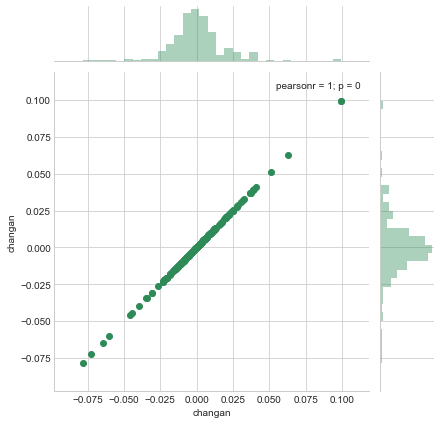

In [61]:
sns.jointplot('changan', 'changan', auto_rets,
             kind='scatter', color='seagreen')

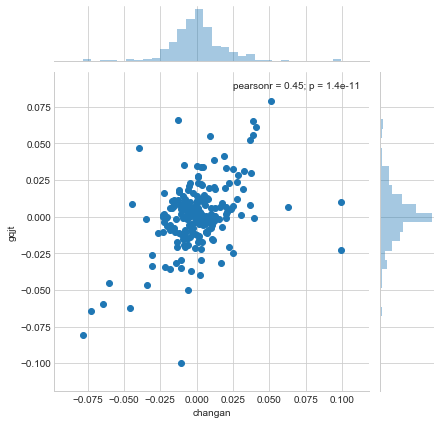

In [62]:
sns.jointplot('changan', 'gqjt', auto_rets, kind='scatter')

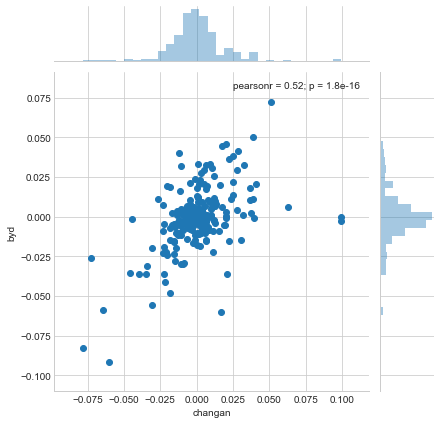

In [63]:
sns.jointplot('changan', 'byd', auto_rets, kind='scatter')

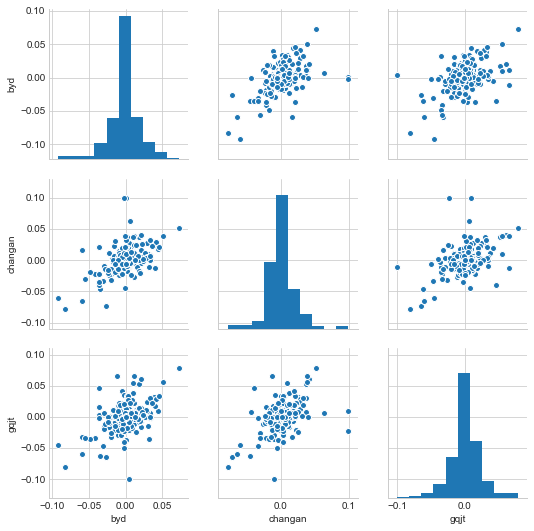

In [64]:
sns.pairplot(auto_rets.dropna())

In [65]:
sns.corrplot(closing_df, annot=True)   # 新的版本中没有了，要通过heatmap来画图

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [68]:
corr = closing_df.corr()
# corr是相关系数
corr

,byd,changan,gqjt
byd,1.000000,-0.008049,0.307799
changan,-0.008049,1.000000,0.503343
gqjt,0.307799,0.503343,1.000000


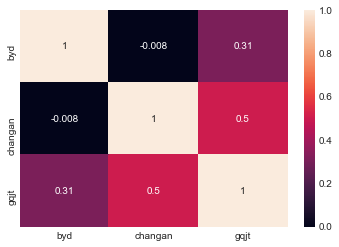

In [67]:
sns.heatmap(corr, annot=True)